# Main System Check

This notebook checks the proposed structure in *One-to-many Conversion for Percussive Samples*.

In [1]:
from numbers import Real
from shelving import Class_IIR_Shelving
from velvetnoise import velvet_noise
from utils import print_audio_info, Audio, write_audio

import numpy as np
import numpy.typing as npt
import scipy.signal as signal
import scipy.io as sio
import scipy.io.wavfile

import IPython

import matplotlib.pyplot as plt

import librosa
import librosa.display

## Read Samples

In [2]:
piano_file = './audio/piano_mute.wav'
piano_sr, piano_data = scipy.io.wavfile.read(piano_file)
print_audio_info('Piano mute', piano_data, piano_sr)
IPython.display.Audio(piano_file)

Piano mute sample.Sample rate 44100.Data type float32.Has 2Has 63716 samples


/tmp/ipykernel_4002/3435806349.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  piano_sr, piano_data = scipy.io.wavfile.read(piano_file)


In [3]:
hihat_file = './audio/hihat.wav'
hihat_sr, hihat_data = sio.wavfile.read(hihat_file)
print_audio_info('Hihat', hihat_data, hihat_sr)
IPython.display.Audio(hihat_file)

Hihat sample.Sample rate 44100.Data type int16.Has 2Has 14705 samples


In [4]:
snare_file = './audio/snare.wav'
snare_sr, snare_data = sio.wavfile.read(snare_file)
print(f'Snare sample, sample rate {snare_sr}, data type {snare_data.dtype}')
IPython.display.Audio(snare_file)

Snare sample, sample rate 44100, data type int16


## Apply Effects to Audio

In [5]:
iir1 = Class_IIR_Shelving(fc=200, G=-2.0, fs=piano_sr)
piano_data_iir = iir1.filtering(piano_data)
piano_data.shape, piano_data_iir.shape

((63716, 2), (63716, 2))

In [6]:
write_audio("audio/test.wav", piano_sr, piano_data_iir)

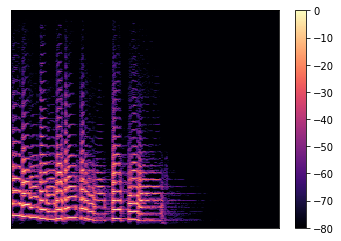

In [8]:
y, sr = librosa.load(librosa.ex('trumpet'))
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

In [28]:
vn1 = velvet_noise(piano_sr, 10, 20, -1)
piano_data_vn = signal.lfilter(vn1, [1], piano_data_iir)
piano_data.shape, piano_data_vn.shape

((63716, 2), (63716, 2))

In [29]:
np.max(piano_data), np.max(piano_data_iir), np.max(piano_data_vn)

(0.50115967, 0.5002154338639877, 0.0)